# K-Nearest Neighbors

The analysis determined for what properties contribution to the variance in the quality ranking (which has a score between 0 and 10).
In order to make a model to predict the quality of wine, we'll use KNN algorithm.

We start to formulate the assuptions:
- H0: None of the variance in the quality of the wine can be explained by its properties;
- H1: That psycochemical properties contribution to the variance in the quality ranking.

### Import data set

In [1]:
import pandas as pd

# We've got this dataset from: https://archive.ics.uci.edu/ml/datasets/wine+quality
dfWine = pd.read_csv('../Fundamentals/data/winequality-red.csv', sep=';')

### Basic EDA and cleaning data

In [2]:
dfWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Just use python variable replacement syntax to make the text dynamic.
from IPython.display import Markdown as md

md(f"The wine data set consists of {dfWine.shape[1]} different parameters of wine which was measured for {dfWine.shape[0]} wine samples.")

The wine data set consists of 12 different parameters of wine which was measured for 1599 wine samples.

Type data and memory usage

In [4]:
dfWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All data is numerical (no categorical data).
The next step is searching for missing, NA and null values.

In [5]:
(dfWine.isnull() | dfWine.empty | dfWine.isna()).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Fortunately,  we're not doing anything.
Let's show the summary statistics.

In [6]:
dfWine.sort_index(axis=1, ascending=True).describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,1599.0,10.422983,1.065668,8.40000,9.5000,10.20000,11.100000,14.90000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
quality,1599.0,5.636023,0.807569,3.00000,5.0000,6.00000,6.000000,8.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


See distributions:

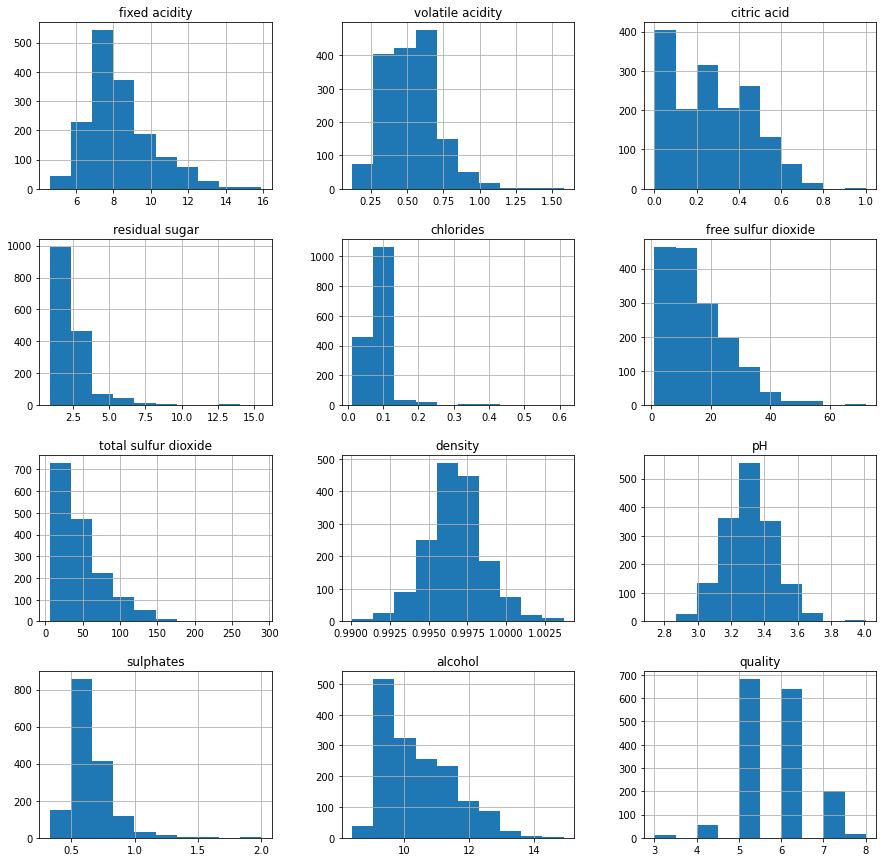

In [7]:
plot = dfWine.hist(figsize = (15,15))

All values are continuous numerical; there are no missing values in any of the variables.

In the histograms we can observe how pH and density has a more or less centered distribution, while none of the other follows a normal distribution.

The wine quality data distribution is bimodal type and there are more wines with average quality than the others type.

Let's find some notificable pattern.

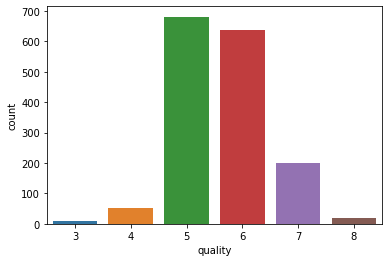

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=dfWine['quality'])
plt.show()

Mostly the given data has a wine quality of 5 and 6.

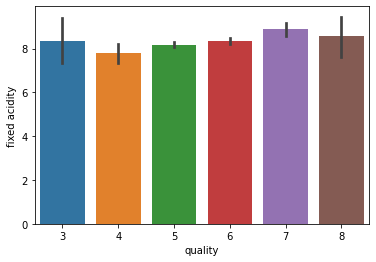

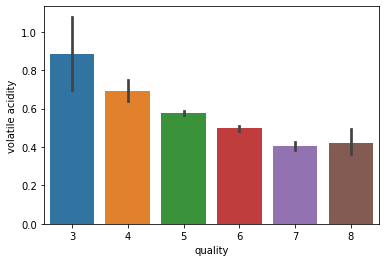

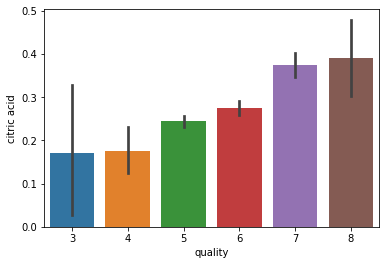

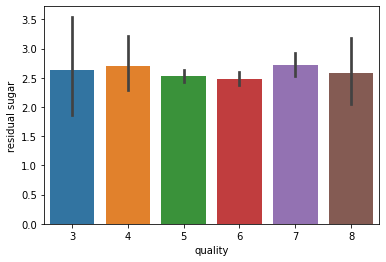

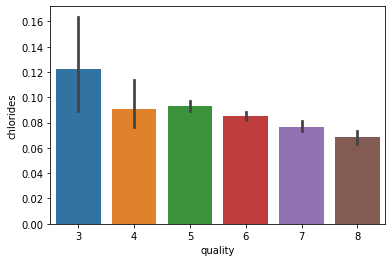

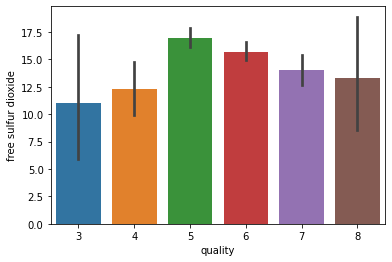

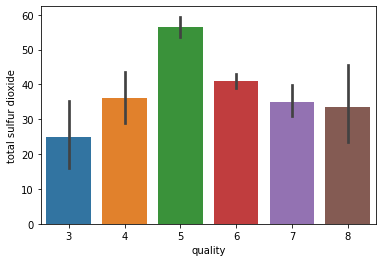

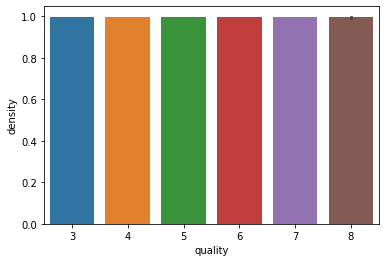

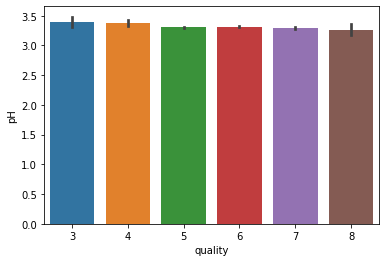

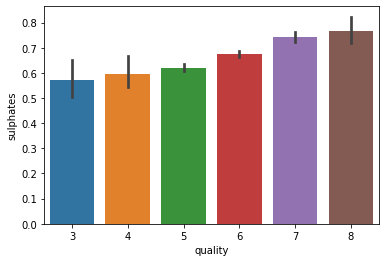

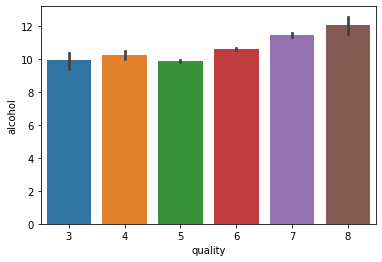

In [9]:
cols_names = dfWine.columns.drop("quality").values.tolist()

for name in cols_names:
    sns.barplot(x='quality',y=name,data=dfWine)
    plt.show()

As we can see there are pattern of relativesness between quality and some properties; more specifically the quality increases with:
- <b>volatile acidity</b>: &darr; content
- <b>citric acid</b>: &uarr; content
- <b>chlorides</b>:  &darr; content
- <b>sulphares</b>: &uarr; content
- <b>alcohol</b>: &uarr; content

We can find what weìve seen before in other way:

In [10]:
dfTmp = dfWine[["volatile acidity", "citric acid", "chlorides", "sulphates", "alcohol", "quality"]].copy()
dfTmp.groupby(["alcohol"]).first().sort_values("quality", ascending=False)

,volatile acidity,citric acid,chlorides,sulphates,quality
alcohol,,,,,
12.60,0.32,0.45,0.073,0.82,8
13.40,0.62,0.67,0.086,0.69,8
12.80,0.35,0.46,0.078,0.86,8
9.50,0.58,0.02,0.073,0.57,7
11.70,0.65,0.01,0.078,0.74,7
...,...,...,...,...,...
9.00,0.59,0.08,0.086,0.50,4
11.40,1.09,0.06,0.061,0.43,4
13.10,0.52,0.15,0.054,0.56,4


We can see that a upper alcohol corresponds to lower volatile acidity etc.
Last different point of view: making a Pivot table which is useful to track the sum of and to easily compare to one another.

In [11]:
from IPython.display import HTML

dfTmp = dfWine.loc[:, dfWine.columns != 'quality'].copy()
df_pivotTable = dfWine.pivot_table(dfTmp, ['quality'], aggfunc='median')
display(df_pivotTable)

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,9.925,0.0905,0.035,0.997565,7.50,6.0,3.39,2.1,0.545,15.0,0.845
4,10.000,0.0800,0.090,0.996500,7.50,11.0,3.37,2.1,0.560,26.0,0.670
5,9.700,0.0810,0.230,0.997000,7.80,15.0,3.30,2.2,0.580,47.0,0.580
6,10.500,0.0780,0.260,0.996560,7.90,14.0,3.32,2.2,0.640,35.0,0.490
7,11.500,0.0730,0.400,0.995770,8.80,11.0,3.28,2.3,0.740,27.0,0.370
8,12.150,0.0705,0.420,0.994940,8.25,7.5,3.23,2.1,0.740,21.5,0.370


### Checking the correlation between attributes

There are six classes in the target (that is between 0 and 10).
In order to understand how much feature correlates with the target, in other words the relationship from properties and the quality of a wine, we'll use the Pearson correlation coefficient which gives you the measure of the strength of association between two variables. 
Remember that it has a value between -1 and 1 where:

    -1 indicates a perfectly negative linear correlation between two variables
     0 indicates no linear correlation between two variables
     1 indicates a perfectly positive linear correlation between two variables

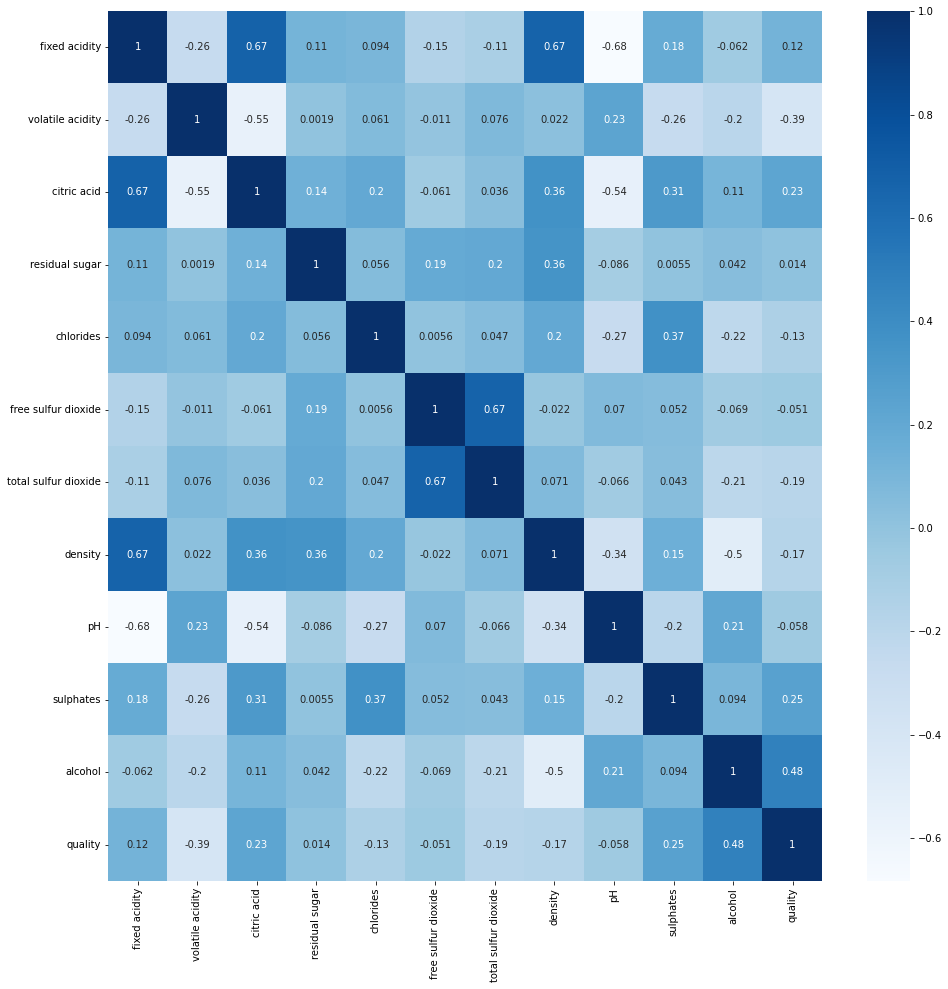

In [12]:
corrMatrix = dfWine.corr(method='pearson')
plt.figure(figsize=(16, 16))
sns.heatmap(corrMatrix, cmap="Blues", annot=True)
plt.show()

We can see two things: what we said before (for example the "quality" value tends to go up when the "alcohol" goes up) and that the max correlation coefficient is 0.67 for many properties. 
For better understanding the relationship beetween these pairs, we can use the scatterplot matrix which uses dots to represent values for two different numeric variables. 

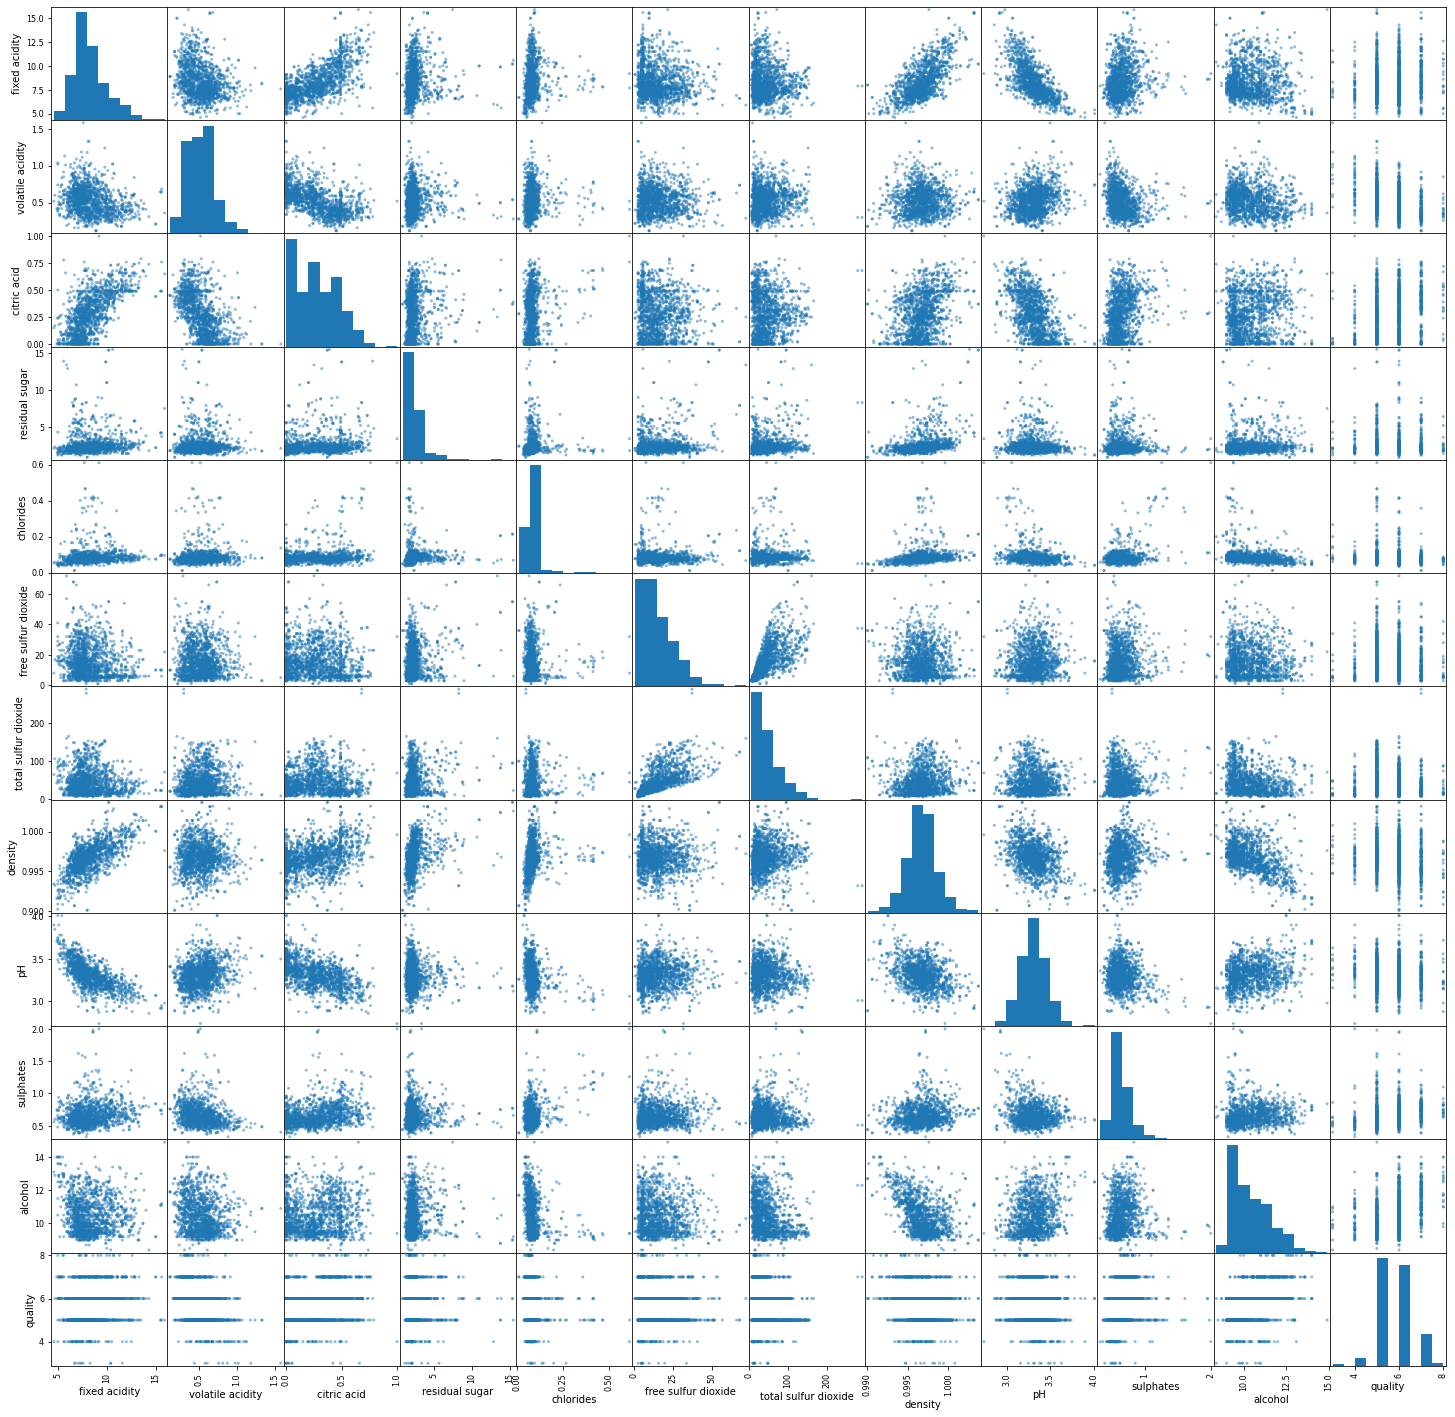

In [13]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(dfWine,figsize=(25, 25))

As observed, data isn't scattered to a very large extent.
Keep in mind the correlation between some properties, for example between "fixed acidity" and "density": looking at corresponding for them into scatterplot and we can see the positive linear correlation between attributes.

### Train and test the model

Spit data in train and test parts.

In [14]:
from sklearn.model_selection import train_test_split

X = dfWine.drop('quality', axis=1)
y = dfWine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Before build a new KNN model, we have to find out "Optimum Neighbours" number in the KNN classification, and to do that we need to calculate the minimun Error Rate.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

lstErrorRate = []
myrange = range(1, 50)

for i in myrange:
    modelTmp = KNeighborsClassifier(n_neighbors=i)
    modelTmp.fit(X_train,y_train)
    XTestPredict = modelTmp.predict(X_test)
    lstErrorRate.append(np.mean(XTestPredict != y_test))

minimumK = lstErrorRate.index(min(lstErrorRate))+1

Minimum error is 0.45625 at n_neighbors = 1


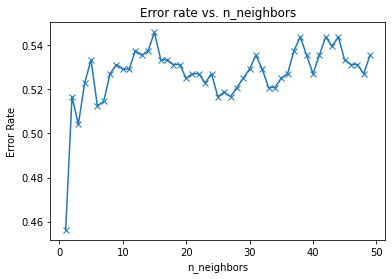

In [16]:
plt.title('Error rate vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Error Rate')
plt.plot(myrange, lstErrorRate, marker='x', markerfacecolor='red')
print(f"Minimum error is {min(lstErrorRate)} at n_neighbors = {minimumK}")

In [17]:
model = KNeighborsClassifier(n_neighbors=minimumK)

#### Predict with no scaled data
For convenience of explaining what to do and what not to do, we improperly fit and predict the model with no scaled data. But remember: variables that are measured at different scales do not contribute equally to the model fitting. That why we'll scale them later.

In [18]:
model.fit(X_train, y_train)
p_train = model.predict(X_train)
p_test = model.predict(X_test)

Finally we can estimate how accurately the model can predict the type of cultivars.

In [19]:
from sklearn.metrics import accuracy_score

acc_not_scaled_train = accuracy_score(y_train, p_train)
acc_not_scaled_test = accuracy_score(y_test, p_test)
print(f'Accuracy not scaled train data: {acc_not_scaled_train}')
print(f'Accuracy not scaled test data: {acc_not_scaled_test}')

Accuracy not scaled train data: 1.0
Accuracy not scaled test data: 0.54375


As we can see, the test accuracy isn't the best!

#### Predict with scaled data

Why Scaling the data for KNN? It is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN.
So we rescaled data by using the <b>MinMaxScaler</b> estimator, that scales and translates each feature individually such that it is in the given range on the training set.

$x_{scaled} = \frac{x - x_{min}} {x_{max} - x_ {min}}$

But, what does it do? All features will be transformed so that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [21]:
X_trainScaled, X_testScaled, y_trainScaled, y_testScaled = train_test_split(X, y, test_size=0.3)

# model = KNeighborsClassifier()

model.fit(X_trainScaled, y_trainScaled)

p_trainScaled = model.predict(X_trainScaled)
p_testScaled = model.predict(X_testScaled)

acc_scaled_train = accuracy_score(y_trainScaled, p_trainScaled)
acc_scaled_test = accuracy_score(y_testScaled, p_testScaled)
print (f'\nAccuracy scaled train data: {acc_scaled_train}')
print (f'Accuracy scaled test data: {acc_scaled_train}')


Accuracy scaled train data: 1.0
Accuracy scaled test data: 1.0


As you see, the accuracy became "perfect", but only because that it's a small dataset! If only things were always like this!

### Model Performance Analysis

We'll use two measures:
1. Confusion Matrix
2. Classification Report with Precision, Recall and F1-Score.

The confusion matrix is a table that is used to show the number of correct and incorrect predictions on a classification problem when the real values of the Test Set are known. It is of the format

|    |    |
|----|----|
| TP | FP |
| FN | TN |

In [22]:
confusionMatrixNotScaled = pd.crosstab(y_test, p_test)
confusionMatrixScaled = pd.crosstab(y_testScaled, p_testScaled)

print("-------------------------------")
print("Not scaled data")
print("-------------------------------")
print(confusionMatrixNotScaled)
print("-------------------------------")
print("Scaled data")
print("-------------------------------")
print(confusionMatrixScaled)

-------------------------------
Not scaled data
-------------------------------
col_0    3  4    5    6   7  8
quality                       
3        0  0    0    0   1  0
4        2  0    6    9   2  1
5        1  0  122   51  10  1
6        0  9   61  111  19  2
7        0  1    8   27  28  1
8        0  0    0    5   2  0
-------------------------------
Scaled data
-------------------------------
col_0    3  4    5    6   7  8
quality                       
3        0  0    2    1   0  0
4        1  1    8    7   0  0
5        1  6  147   44   5  0
6        0  2   50  113  23  0
7        0  2    5   23  29  2
8        0  0    1    5   2  0


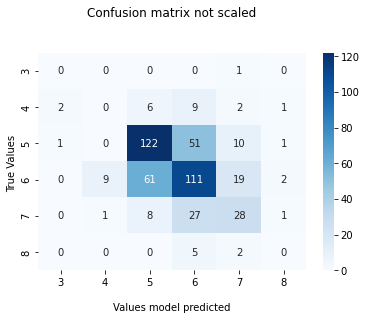

Classification Report Not Scaled
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        20
           5       0.62      0.66      0.64       185
           6       0.55      0.55      0.55       202
           7       0.45      0.43      0.44        65
           8       0.00      0.00      0.00         7

    accuracy                           0.54       480
   macro avg       0.27      0.27      0.27       480
weighted avg       0.53      0.54      0.54       480



In [23]:
from sklearn.metrics import classification_report

classificationReportNotScaled = classification_report(y_test, p_test)

fx = sns.heatmap(confusionMatrixNotScaled, annot=True, cmap='Blues', fmt='d')
fx.set_title('Confusion matrix not scaled\n\n');
fx.set_xlabel('\nValues model predicted')
fx.set_ylabel('True Values ')
plt.show()
print(f"Classification Report Not Scaled\n{classificationReportNotScaled}")

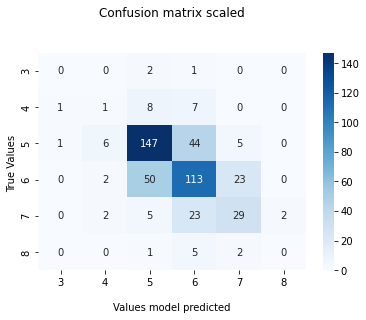

Classification Report Scaled
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.09      0.06      0.07        17
           5       0.69      0.72      0.71       203
           6       0.59      0.60      0.59       188
           7       0.49      0.48      0.48        61
           8       0.00      0.00      0.00         8

    accuracy                           0.60       480
   macro avg       0.31      0.31      0.31       480
weighted avg       0.59      0.60      0.60       480



In [24]:
classificationReportScaled = classification_report(y_testScaled, p_testScaled)

fx = sns.heatmap(confusionMatrixScaled, annot=True, cmap='Blues', fmt='d')
fx.set_title('Confusion matrix scaled\n\n');
fx.set_xlabel('\nValues model predicted')
fx.set_ylabel('True Values ')
plt.show()
print(f"Classification Report Scaled\n{classificationReportScaled}")

As we can see, how all evaluating classification models have grown, after scaling.